<a href="https://colab.research.google.com/github/Ria2810/Netflix-recommendation/blob/main/Edu_project_netflix_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                      PROJECT
                                 PREDICT THE INTEREST OF USERS USING NETFLIX DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
netflix = pd.read_csv(r"C:\Users\riach\Downloads\netflix.csv")

In [ ]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


DATASET INFORMATION AND DESCRIPTION

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


In [ ]:
netflix.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


DATA WRANGLING

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


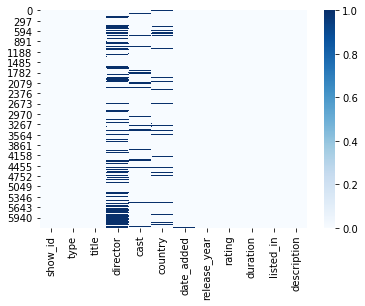

In [ ]:
print(netflix.isnull().sum())
print(sns.heatmap(netflix.isnull(), cmap = 'Blues'))

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


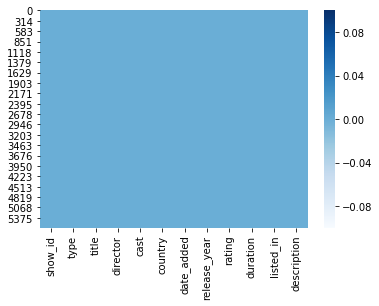

In [ ]:
netflix.dropna(inplace = True)
print(netflix.isnull().sum())
print(sns.heatmap(netflix.isnull(), cmap = 'Blues'))

DATASET SHAPE AND INDEX VALUES

In [ ]:
netflix.shape

(3774, 12)

In [ ]:
netflix.index.size

3774

In [ ]:
df = netflix

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."


# RATINGS EVALUATION

In [ ]:
df.rating.value_counts()

TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: rating, dtype: int64

In [ ]:
df['rating'].unique()

array(['TV-PG', 'TV-14', 'R', 'TV-MA', 'NR', 'PG-13', 'PG', 'TV-Y7', 'G',
       'TV-G', 'UR', 'TV-Y7-FV', 'TV-Y', 'NC-17'], dtype=object)

SHORTENING THE RATINGS INTO (KIDS,TEENS,ADULTS,UR)

In [ ]:
df['rating']=np.where(df['rating'] =='TV-Y', 'Kids', df['rating'])
df['rating']=np.where(df['rating'] =='TV-Y7', 'Kids', df['rating'])
df['rating']=np.where(df['rating'] =='TV-G', 'Kids', df['rating'])
df['rating']=np.where(df['rating'] =='G', 'Kids', df['rating'])
df['rating']=np.where(df['rating'] =='PG', 'Kids', df['rating'])
df['rating']=np.where(df['rating'] =='TV-PG', 'Kids', df['rating'])
df['rating']=np.where(df['rating'] =='TV-Y7-FV', 'Kids', df['rating'])

In [ ]:
df['rating']=np.where(df['rating'] =='R', 'Adults', df['rating'])
df['rating']=np.where(df['rating'] =='NC-17', 'Adults', df['rating'])
df['rating']=np.where(df['rating'] =='TV-MA', 'Adults', df['rating'])

In [ ]:
df['rating']=np.where(df['rating'] =='TV-14', 'Teens', df['rating'])
df['rating']=np.where(df['rating'] =='PG-13', 'Teens', df['rating'])

In [ ]:
df['rating']=np.where(df['rating'] =='NR', 'UR', df['rating'])

In [ ]:
df['rating'].unique()

array(['Kids', 'Teens', 'Adults', 'UR'], dtype=object)

In [ ]:
df['rating'].value_counts()

Adults    1691
Teens     1195
Kids       706
UR         182
Name: rating, dtype: int64

COUNTPLOT OF RATINGS

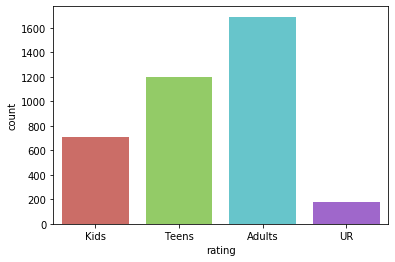

In [ ]:
sns.countplot(x='rating',data=df,palette='hls')
plt.show()

# CORELATIONS

In [ ]:
corr = df.corr(method='pearson')
corr

,show_id,release_year
show_id,1.000000,0.607128
release_year,0.607128,1.000000


HEATMAP OF THE CORELATIONS

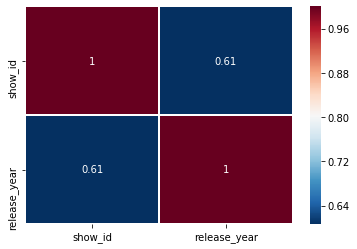

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.5)

# PAIRPLOT OF RATINGS

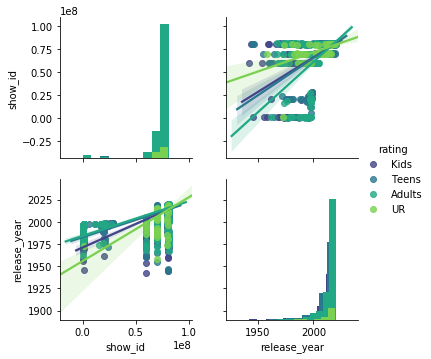

In [ ]:
sns.pairplot(df, hue = 'rating', kind = 'reg', diag_kind = 'hist', palette = 'viridis' )

# CREATING DUMMIES

In [ ]:
rate = pd.get_dummies(df.rating)
rate[:5]

,Adults,Kids,Teens,UR
0,0,1,0,0
4,0,0,1,0
6,1,0,0,0
7,1,0,0,0
9,1,0,0,0


In [ ]:
types = pd.get_dummies(df.type,drop_first = True)
types[:5]

,TV Show
0,0
4,0
6,0
7,0
9,0


In [ ]:
df_final = pd.concat([df, rate, types], axis =1)
df_final.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Adults,Kids,Teens,UR,TV Show
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,Kids,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0,1,0,0,0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,Teens,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0,0,1,0,0


In [ ]:
df_final = df_final.drop(['type','rating','description','listed_in','title','date_added','director','show_id','country','cast','release_year','duration'],axis=1)
df_final.head(3)

,Adults,Kids,Teens,UR,TV Show
0,0,1,0,0,0
4,0,0,1,0,0
6,1,0,0,0,0


# SPLITTING AND PREDICTING DATA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = df_final[['Adults','Kids','Teens','UR']]
y = df_final['TV Show']

In [ ]:
nt = LogisticRegression()

In [ ]:
nt.fit(x,y)

C:\Users\riach\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = nt.predict(x)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# CONFUSION MATRIX

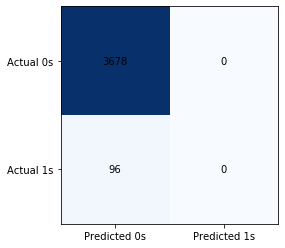

In [ ]:
cm = confusion_matrix(y,predictions)
fig,ax = plt.subplots(figsize = (4,4))
ax.imshow(cm, cmap = 'Blues')
ax.xaxis.set(ticks = (0,1), ticklabels = ('Predicted 0s' , 'Predicted 1s'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('Actual 0s' , 'Actual 1s'))
ax.set_ylim(1.5,0-.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha = 'center', va = 'center' , color = 'black')
plt.show()

# CLASSIFICATION REPORT

In [ ]:
classification_report(y, predictions)

C:\Users\riach\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      3678\n           1       0.00      0.00      0.00        96\n\n    accuracy                           0.97      3774\n   macro avg       0.49      0.50      0.49      3774\nweighted avg       0.95      0.97      0.96      3774\n'

In [ ]:
accuracy = 0.97 * 100
accuracy

97.0

# TRAINING AND TESTING DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 45, stratify=y)

In [ ]:
nt.fit(x_train,y_train)

C:\Users\riach\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_train.head(2)

,Adults,Kids,Teens,UR
3432,1,0,0,0
620,0,0,1,0


In [ ]:
y_train.head()

3432    0
620     0
3947    0
2120    0
2072    0
Name: TV Show, dtype: uint8

In [ ]:
print("Total Train Data:")
print("Total number of items ratings in train data = "+str(x_train.shape[0]))

Total Train Data:
Total number of items ratings in train data = 2528
